### Ex1 
Use data from Danmarks Statistik - Databanken
Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol


In [107]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [100]:
import pandas as pd 
#What is the change in pct of divorced danes from 2008 to 2020?

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&CIVILSTAND=F&Tid=2008K1%2C2008K2%2C2008K3%2C2008K4%2C2020K1%2C2020K2%2C2020K3%2C2020K4'
data = pd.read_csv(url,sep=';')
content = list(data['INDHOLD'])
print(content)

year_list1 = ["2008K1","2008K2","2008K3","2008K4"]
filtered_data_2008 = data[data['TID'].isin(year_list1)]
total_divorces_2008 = sum(filtered_data_2008['INDHOLD'])

year_list2 = ["2020K1","2020K2","2020K3","2020K4"]
filtered_data_2020 = data[data['TID'].isin(year_list2)]
total_divorces_2020 = sum(filtered_data_2020['INDHOLD'])

#### Calculate percentage difference #### 
#Decrease = Original Number - New Number
decrease = abs(total_divorces_2020-total_divorces_2008)
print("Difference: ", decrease)
#Percent difference = Decrease ÷ Original Number × 100
percent_diff = (decrease/total_divorces_2008) * 100
print("Percentage difference between 2008 and 2020: ", percent_diff, "%")



[428864, 431550, 432713, 432156, 544588, 548229, 550715, 552419]
Difference:  470668
Percent difference between 2008 and 2020:  27.280625845151203 %


In [105]:
# B Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

data2020_2 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVIbLSTAND=U&Tid=2020K4&OMR%C3%85DE=101%2C461%2C751%2C851%2C561', sep=';')

sorted_cities_2020 = data2020_2.sort_values('INDHOLD', ascending=False)

print(sorted_cities_2020)


  CIVILSTAND     TID     OMRÅDE  INDHOLD
0      Ugift  2020K4  København   417782
2      Ugift  2020K4     Aarhus   211863
3      Ugift  2020K4    Aalborg   120226
1      Ugift  2020K4     Odense   113639
4      Ugift  2020K4    Esbjerg    55161


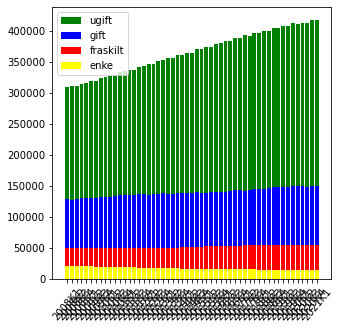

In [109]:
#C Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

data_for_bar = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&Tid=*&CIVILSTAND=U%2CG%2CE%2CF', sep=";")

tid = sorted(list(set(data_for_bar['TID'])))

ugift = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Ugift']['INDHOLD']
gift = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Gift/separeret']['INDHOLD']
enke = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Enke/enkemand']['INDHOLD']
fraskilt = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Fraskilt']['INDHOLD']

plt.figure(figsize=(5,5))
plt.xticks(rotation=50)

p1 = plt.bar(tid, ugift, color='green')
p2 = plt.bar(tid, gift, color='blue')
p3 = plt.bar(tid, fraskilt, color='red')
p4 = plt.bar(tid, enke, color='yellow')

plt.legend([p1,p2,p3,p4],['ugift', 'gift','fraskilt', 'enke'])

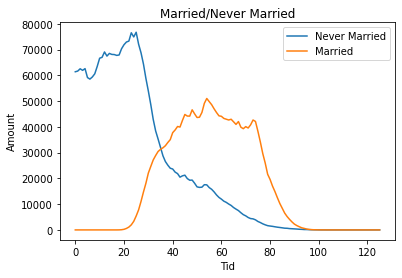

In [111]:
#D Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020

data_for_plots = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G%2CU&Tid=2020K4&ALDER=*', sep=";")

tid = list(range(0, 126))

ugift = data_for_plots.loc[data_for_plots['CIVILSTAND'] == 'Ugift']['INDHOLD'][1:]
gift = data_for_plots.loc[data_for_plots['CIVILSTAND'] == 'Gift/separeret']['INDHOLD'][1:]

plt.title('Married/Never Married')
plt.xlabel('Tid')
plt.ylabel('Amount')

plt.plot(tid, ugift, label="Never Married")
plt.plot(tid, gift, label="Married")

plt.legend()